# What is the most optimal skill to learn for Data Analysts?

## Methododlogy

### 1. Group skills to determine median salary and likeihood of being in posting
### 2. Visualize median salary vs percent skill demand 
### 3. Determine if certain technologies are more prevalent



In [2]:
#Importing required libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\maheb\anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])
df_US_DA_exploded = df_US_DA.explode('job_skills')

In [4]:
 df_skills = df_US_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
 df_skills = df_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

In [5]:
DA_job_count = len(df_US_DA)

In [6]:
df_skills['skill_percent'] = (df_skills['skill_count']/DA_job_count)*100


In [7]:
skill_perc = 5
df_DA_skills_demand = df_skills[df_skills['skill_percent'] > skill_perc]


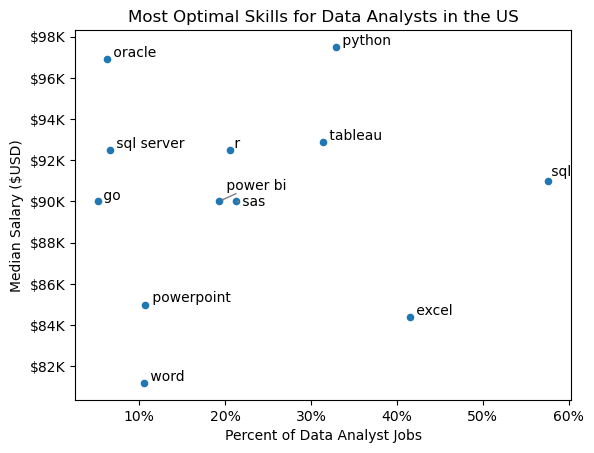

In [8]:
from adjustText import adjust_text

df_DA_skills_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
 
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_demand.index):
    texts.append(plt.text(df_DA_skills_demand['skill_percent'].iloc[i], df_DA_skills_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))  

plt.show()

In [9]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'looker',
  'ssrs',
  'microstrategy',
  'datarobot',
  'visio',
  'msaccess',
  'sas',
  'ms access',
  'sap',
  'qlik',
  'powerbi',
  'cognos',
  'esquisse',
  'outlook',
  'tableau',
  'excel',
  'powerpoint',
  'spss',
  'spreadsheet',
  'ssis',
  'sheets',
  'nuix',
  'dax',
  'power bi',
  'word',
  'splunk',
  'sharepoint'],
 'programming': ['typescript',
  'swift',
  'powershell',
  'bash',
  'sass',
  'cobol',
  'objective-c',
  'elixir',
  'crystal',
  'java',
  'golang',
  'lisp',
  't-sql',
  'c++',
  'assembly',
  'mongo',
  'c#',
  'mongodb',
  'c',
  'ocaml',
  'html',
  'css',
  'shell',
  'sas',
  'groovy',
  'ruby',
  'nosql',
  'clojure',
  'visualbasic',
  'perl',
  'erlang',
  'vba',
  'vb.net',
  'sql',
  'fortran',
  'scala',
  'r',
  'php',
  'javascript',
  'no-sql',
  'python',
  'visual basic',
  'rust',
  'julia',
  'apl',
  'f#',
  'haskell',
  'dart',
  'delphi',
  'kotlin',
  'lua',
  'matlab',
  'solidity',
  'pascal',
  

In [10]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

In [11]:
df_technology = df_technology.explode('skills')


In [12]:
df_DA_skills_color_coding = df_DA_skills_demand.merge(df_technology, left_on='job_skills', right_on='skills')

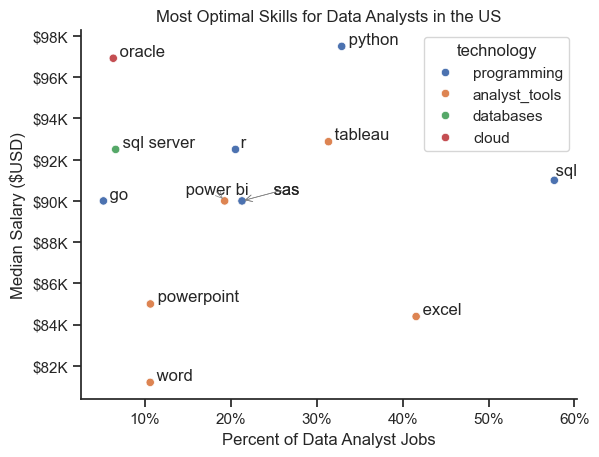

In [14]:
from adjustText import adjust_text

sns.scatterplot(
    data = df_DA_skills_color_coding,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    
)

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')) 
 
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list

texts = []
for i, txt in enumerate(df_DA_skills_color_coding['skills']):
    texts.append(plt.text(df_DA_skills_color_coding['skill_percent'].iloc[i], df_DA_skills_color_coding['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts,   
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), # Define arrow style
            force_text = 0.5,  # Adjust to control the force applied to move text
            force_points = 1.0)  

plt.show()